<a href="https://colab.research.google.com/github/yc-chen10/113-1-finance/blob/main/week11%E4%BD%9C%E6%A5%AD_%E5%A4%9A%E6%A8%A1%E6%85%8B_Multimodal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 發送 HTTP 請求以獲取網路上的資料
import requests

# 用來處理和分析結構化數據
import pandas as pd

# 用來處理時間
import datetime as dt

####抓股票資料（4年）

In [2]:
# "一詮"股票代號
stock_id = '2486'

# 獲取今天的日期（型別：str）
date = dt.date.today().strftime("%Y%m%d")
# date = yyyymmdd

print('今日日期：', date)

# 取得證交所網站資料，帶入網址參數 date：時間，stock_id：股票代號
# https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date=20240923&stockNo=2486
stock_data = requests.get(f'https://www.twse.com.tw/rwd/zh/ \
            afterTrading/STOCK_DAY?date={date}&stockNo={stock_id}')

# 將結果轉換 JSON 格式
json_data = stock_data.json()

# 將 JSON 格式轉換爲 Dataframe 格式，
# 方便在 Python 中處理結構化資料
df = pd.DataFrame(data=json_data['data'],
                  columns=json_data['fields'])

df

今日日期： 20241125


,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,113/11/01,"17,157,164","2,185,284,345",124.00,130.00,122.00,130.00,+4.50,"9,840"
1,113/11/04,"15,117,268","1,940,280,697",129.00,130.50,126.50,127.00,-3.00,"8,012"
2,113/11/05,"17,571,795","2,263,681,296",127.00,132.50,126.00,127.50,+0.50,"9,858"
3,113/11/06,"15,581,733","1,972,558,933",128.00,129.50,124.50,126.00,-1.50,"9,213"
4,113/11/07,"14,530,182","1,856,245,913",128.50,130.00,126.00,126.00,0.00,"8,245"
5,113/11/08,"13,921,510","1,774,966,396",128.50,130.00,125.50,126.50,+0.50,"7,944"
6,113/11/11,"27,778,630","3,376,455,820",127.00,129.00,117.50,119.00,-7.50,"15,937"
7,113/11/12,"12,877,057","1,517,917,913",117.50,120.00,115.00,119.50,+0.50,"7,519"
8,113/11/13,"11,461,971","1,341,284,585",118.50,119.50,115.50,115.50,-4.00,"6,335"
9,113/11/14,"11,786,578","1,368,232,949",116.50,119.00,114.00,115.00,-0.50,"6,646"


In [3]:
def get_stock_data(stock_no, year, month):
    # 將日期格式化為 'yyyymmdd'，並指定為該月份的第一天
    date = f"{year}{str(month).zfill(2)}01"
    url = f"https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date={date}&stockNo={stock_no}"

    # 發送HTTP請求並獲取響應
    response = requests.get(url)
    if response.status_code == 200:
        # 將結果轉換為JSON
        data = response.json()
        if data['stat'] == 'OK':
            # 返回數據中的每日交易資料
            return pd.DataFrame(data['data'], columns=data['fields'])
        else:
            print(f"No data for {year}-{month}")
            return None
    else:
        print(f"Failed to fetch data for {year}-{month}")
        return None


In [4]:
def get_multiple_months(stock_no, start_year, start_month, end_year, end_month):
    all_data = []

    # 循環通過年份和月份來調用API
    current_year = start_year
    current_month = start_month

    while (current_year < end_year) or (current_year == end_year and current_month <= end_month):
        # 獲取單月的股票資料
        monthly_data = get_stock_data(stock_no, current_year, current_month)
        if monthly_data is not None:
            all_data.append(monthly_data)

        # 更新到下一個月份
        if current_month == 12:
            current_month = 1
            current_year += 1
        else:
            current_month += 1

    # 合併所有月份的數據
    if all_data:
        return pd.concat(all_data, ignore_index=True)
    else:
        return None


In [5]:
stock_no = '2486'
start_year = 2021
start_month = 9
end_year = 2024
end_month = 9

stock_data = get_multiple_months(stock_no, start_year, start_month, end_year, end_month)

# 打印股票資料
if stock_data is not None:
    print(stock_data)


            日期        成交股數           成交金額     開盤價     最高價    最低價     收盤價  \
0    110/09/01  22,328,010  1,171,695,669   50.20   53.90  50.20   53.00   
1    110/09/02  35,639,973  1,935,066,472   52.80   55.50  52.50   54.70   
2    110/09/03  18,766,743  1,013,755,989   54.50   55.50  53.10   54.50   
3    110/09/06  18,137,809    989,826,334   54.10   55.90  53.30   53.50   
4    110/09/07  18,660,351    941,627,386   53.20   53.60  48.75   50.00   
..         ...         ...            ...     ...     ...    ...     ...   
744  113/09/24   8,628,849    821,923,069   94.20   97.30  93.30   94.60   
745  113/09/25   6,529,733    622,251,538   95.60   96.30  94.60   94.90   
746  113/09/26  29,060,361  2,930,693,598   95.80  103.50  95.10  100.50   
747  113/09/27  29,915,593  3,070,955,106  101.00  106.00  99.90  100.00   
748  113/09/30  14,403,514  1,465,344,231   99.30  104.00  99.00  100.00   

      漲跌價差    成交筆數  
0    +3.10  12,629  
1    +1.70  19,985  
2    -0.20  10,762  
3  

In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   日期      749 non-null    object
 1   成交股數    749 non-null    object
 2   成交金額    749 non-null    object
 3   開盤價     749 non-null    object
 4   最高價     749 non-null    object
 5   最低價     749 non-null    object
 6   收盤價     749 non-null    object
 7   漲跌價差    749 non-null    object
 8   成交筆數    749 non-null    object
dtypes: object(9)
memory usage: 52.8+ KB


#### 時間格式轉換def

In [7]:
def convert_minguo_to_ad(date_str):
    # 113/09/10 透過「/」分割成清單 [113, 09, 10]
    # 分配給變數 year=113, month=09, day=10
    year, month, day = date_str.split('/')
    ad_year = int(year) + 1911  # 將民國年轉換為西元年
    return f"{ad_year}/{month}/{day}"

# 所有民國日期都轉西元日期 e.g.113/09/10 -> 2024/09/10
stock_data['日期'] = stock_data['日期'].apply(convert_minguo_to_ad)

In [8]:
# 轉換為 pandas 中的 datetime 格式
stock_data['日期'] = pd.to_datetime(stock_data['日期'], format='%Y/%m/%d')

In [9]:
stock_data.head()

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,2021-09-01,"22,328,010","1,171,695,669",50.20,53.90,50.20,53.00,+3.10,"12,629"
1,2021-09-02,"35,639,973","1,935,066,472",52.80,55.50,52.50,54.70,+1.70,"19,985"
2,2021-09-03,"18,766,743","1,013,755,989",54.50,55.50,53.10,54.50,-0.20,"10,762"
3,2021-09-06,"18,137,809","989,826,334",54.10,55.90,53.30,53.50,-1.00,"10,030"
4,2021-09-07,"18,660,351","941,627,386",53.20,53.60,48.75,50.00,-3.50,"10,851"


#### 轉數字 numeric

In [10]:
#確保stock_data 轉成數字
stock_data['收盤價'] = stock_data['收盤價'].apply(pd.to_numeric, errors='coerce')
stock_data['開盤價'] = stock_data['開盤價'].apply(pd.to_numeric, errors='coerce')
stock_data['最高價'] = stock_data['最高價'].apply(pd.to_numeric, errors='coerce')
stock_data['最低價'] = stock_data['最低價'].apply(pd.to_numeric, errors='coerce')

In [11]:
stock_data.head()

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,2021-09-01,"22,328,010","1,171,695,669",50.2,53.9,50.20,53.0,+3.10,"12,629"
1,2021-09-02,"35,639,973","1,935,066,472",52.8,55.5,52.50,54.7,+1.70,"19,985"
2,2021-09-03,"18,766,743","1,013,755,989",54.5,55.5,53.10,54.5,-0.20,"10,762"
3,2021-09-06,"18,137,809","989,826,334",54.1,55.9,53.30,53.5,-1.00,"10,030"
4,2021-09-07,"18,660,351","941,627,386",53.2,53.6,48.75,50.0,-3.50,"10,851"


In [12]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   日期      749 non-null    datetime64[ns]
 1   成交股數    749 non-null    object        
 2   成交金額    749 non-null    object        
 3   開盤價     749 non-null    float64       
 4   最高價     749 non-null    float64       
 5   最低價     749 non-null    float64       
 6   收盤價     749 non-null    float64       
 7   漲跌價差    749 non-null    object        
 8   成交筆數    749 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 52.8+ KB


#### K線圖 + 收盤價 輸入到LSTM

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Conv2D, Flatten, MaxPooling2D, concatenate
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:


# ===== Step 1: 資料載入與預處理 =====
# 模擬讀取的數據
df = stock_data.copy()
df['日期'] = pd.to_datetime(df['日期'])
df = df.sort_values('日期')

# 僅選擇用於模型的必要列
closing_prices = df['收盤價'].values.reshape(-1, 1)

# 正規化數據
scaler = MinMaxScaler(feature_range=(0, 1))
closing_prices_scaled = scaler.fit_transform(closing_prices)

# 定義窗口大小
window_size = 20

# 創建輸入特徵和標籤
X_lstm, y = [], []
for i in range(window_size, len(closing_prices_scaled)):
    X_lstm.append(closing_prices_scaled[i-window_size:i, 0])
    y.append(closing_prices_scaled[i, 0])
X_lstm, y = np.array(X_lstm), np.array(y)

# 拆分訓練集和測試集（最後一個月的數據用作測試集）
split_index = len(X_lstm) - 30
X_train_lstm, X_test_lstm = X_lstm[:split_index], X_lstm[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# 調整LSTM輸入形狀
X_train_lstm = np.reshape(X_train_lstm, (X_train_lstm.shape[0], X_train_lstm.shape[1], 1))
X_test_lstm = np.reshape(X_test_lstm, (X_test_lstm.shape[0], X_test_lstm.shape[1], 1))

# ===== Step 2: 生成 K 線圖 =====
def generate_candlestick_chart(data, output_size=(64, 64)):
    """
    根據輸入數據生成單個K線圖。
    """
    fig, ax = plt.subplots(figsize=(2, 2))
    for index, row in data.iterrows():
        color = 'green' if row['開盤價'] < row['收盤價'] else 'red'
        ax.plot([index, index], [row['最低價'], row['最高價']], color='black')  # 畫影線
        ax.bar(index, row['收盤價'] - row['開盤價'], bottom=row['開盤價'], color=color, width=0.5)  # 畫實體
    ax.axis('off')
    fig.canvas.draw()

    # 獲取圖像並轉換為數組
    img = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    img = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.close(fig)
    img = cv2.resize(img, output_size)  # 調整大小
    return img

# 生成K線圖像數據
candlestick_images = []
for i in range(window_size, len(df)):
    sample_data = df.iloc[i-window_size:i]  # 使用窗口內的數據生成K線圖
    img = generate_candlestick_chart(sample_data)
    candlestick_images.append(img)

# 正規化圖像數據並轉換為Numpy數組
candlestick_images = np.array(candlestick_images) / 255.0

# 拆分CNN輸入為訓練集和測試集
X_train_cnn, X_test_cnn = candlestick_images[:split_index], candlestick_images[split_index:]

In [17]:


# ===== Step 4: 建立多模態模型 =====
# 定義LSTM分支
input_lstm = Input(shape=(window_size, 1))
x_lstm = LSTM(50, return_sequences=True)(input_lstm)
x_lstm = LSTM(50)(x_lstm)

# 定義CNN分支
input_cnn = Input(shape=(64, 64, 3))
x_cnn = Conv2D(32, (3, 3), activation='relu')(input_cnn)
x_cnn = MaxPooling2D((2, 2))(x_cnn)
x_cnn = Flatten()(x_cnn)

# 合併兩個分支
combined = concatenate([x_lstm, x_cnn])
output = Dense(1)(combined)

# 建立模型
model = Model(inputs=[input_lstm, input_cnn], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error')

# ===== Step 5: 訓練模型 =====
history = model.fit([X_train_lstm, X_train_cnn], y_train, epochs=10, batch_size=32)





Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 3.2538
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 0.2021
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - loss: 0.0486
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - loss: 0.0310
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0050
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0031
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0026
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - loss: 0.0022
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 0.0020
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0022


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


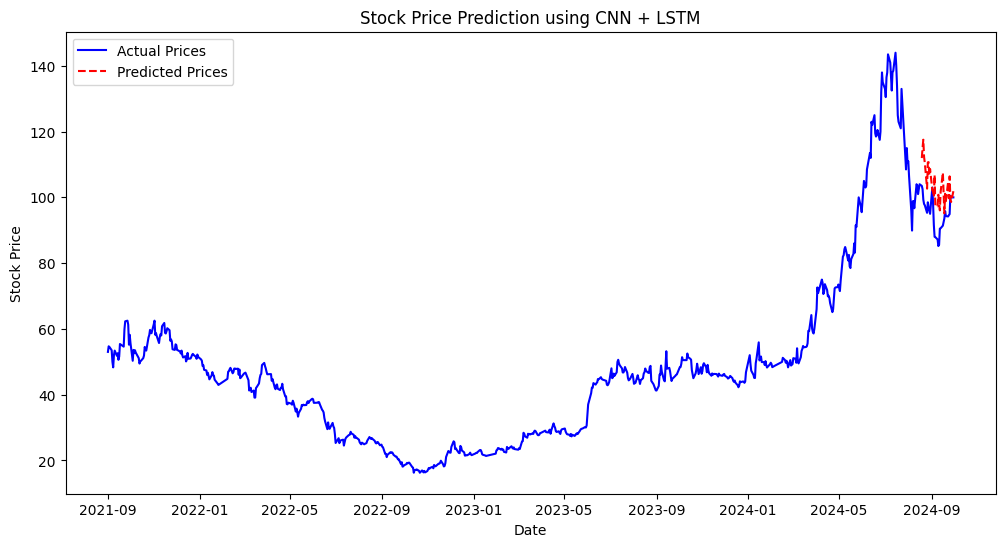

In [18]:
# ===== Step 6: 可視化結果 =====

# 還原整個資料集的真實值
all_closing_prices_actual = scaler.inverse_transform(closing_prices_scaled)

# 預測測試集
predictions = model.predict([X_test_lstm, X_test_cnn])
predictions = scaler.inverse_transform(predictions)

# 建立包含測試區間的空白數據（用 NaN 填充非測試區間）
all_predictions = np.full((len(all_closing_prices_actual), 1), np.nan, dtype=np.float64)
all_predictions[-len(predictions):] = predictions

# 繪製圖表
plt.figure(figsize=(12, 6))

# 藍線（真實值，完整資料）
plt.plot(df['日期'], all_closing_prices_actual, label='Actual Prices', color='blue')

# 紅線（預測值，只顯示在測試集區間）
plt.plot(df['日期'], all_predictions, label='Predicted Prices', color='red', linestyle='dashed')

# 圖表設定
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction using CNN + LSTM')
plt.legend()
plt.show()
